In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC

data = load_breast_cancer()
X, y = data.data, data.target

def fit_models(X):
    param_grid = {'kernel': ['linear','rbf','sigmoid'], 'C': [1,10,100]}#,1e9]}
#     param_grid = {'kernel': ['linear','rbf'], 'C': [1,10,100,1e9]}
    grid = GridSearchCV(SVC(), param_grid, cv=5)
    grid.fit(X, y);
    print(grid.best_params_, grid.best_score_)
    return grid
    
print('Original, full data')
%time orig_grid = fit_models(X)

print('Scaled, full data')
%time scaled_grid = fit_models(MinMaxScaler().fit_transform(X))

print('PCA_2 data')
%time pca_grid = fit_models(PCA(n_components=2).fit_transform(X))

Original, full data
{'C': 100, 'kernel': 'linear'} 0.96309314587
Wall time: 1min 25s
Scaled, full data
{'C': 100, 'kernel': 'sigmoid'} 0.980667838313
Wall time: 356 ms
PCA_2 data
{'C': 1, 'kernel': 'linear'} 0.922671353251
Wall time: 6min 14s


In [8]:
scaled_grid.best_params_

{'C': 100, 'kernel': 'sigmoid'}

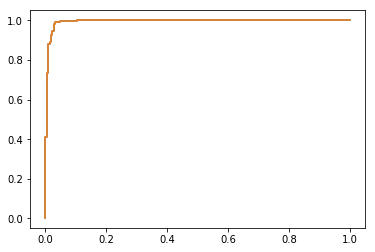

0.993895671476
0.993895671476


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve, roc_auc_score

data = load_breast_cancer()
X, y = data.data, data.target
scale_r = MinMaxScaler().fit(X)
X_scale = scale_r.transform(X)

clf = SVC(C=10,kernel='sigmoid',probability=True)
model = clf.fit(X_scale,y)

scores = model.decision_function(X_scale)
# if scores[i] < 0, obs i is on the class 0 side of boundary, if scores[i] > 0, obs i is on the class 1 side of boundary
# more extreme score[i] -> farther from boundary -> more certain prediction

probs = model.predict_proba(X_scale)
# get posterior distribution probs[i,j] = prob obs i is class j
# negative score[i] -> big prob[i,0] and small prob[i,1]
# positive score[i] -> small prob[i,0] and big prob[i,1]

# so score[i] and prob[i,1] increase together.  In other words, they can be used interchangeably.
# Let's check that they give the same roc curve

score_fpr, score_tpr, score_thresholds = roc_curve(y, scores)
prob_fpr, prob_tpr, prob_thresholds = roc_curve(y, probs[:,1])

plt.plot(score_fpr,score_tpr)
plt.plot(prob_fpr,prob_tpr)
plt.show()
print(roc_auc_score(y, scores))
print(roc_auc_score(y, probs[:,1]))

# Now, decision_function is much more efficient and reliable for SVM than the proba score.  So, from now on, we'll rely on it.